In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})

import os
import sys
os.environ['folderPath'] = '/reg/neh/home/mrware/TRXS'
sys.path.insert(0, os.environ['folderPath'] + '/Libraries/mattsLibraries')
# sys.path.insert(0, os.environ['folderPath'] + '/Jordan_LCLS_scripts/scripts')

from plotStyles import *
from center_finding_tools import *

# Read in data, initialize variables

In [2]:
# looking for a 1024 x 1024 numpy array.  create with command np.save(filename, array)
# install_path = '/reg/neh/home/jneal/Jordan_LCLS_scripts'
# filepath = '/processed/electrons/opal'
# filename = '/opal_tot.npy'
opal = np.load('opal_tot.npy')

In [3]:
'''
Plots example image
Downbins image for speed
Runs Hough circle transform for each given radius
Peakfinds on transformed images
Stacks transformed images based on sum_r, finds peak
Saves peak as numpy array
Plots opal images with found centers as dot
Plots opal images and transformed images with found centers
'''

# should only need to modify these variables
radii = [160, 240, 400, 432, 456, 480, 496] # radii of circle on detector
sum_r =           [400, 432, 456]           # radii to sum together after hough circle transform
pk_thresh  = 0.9  # sets any pixel below pk_thresh * max to zero when peakfinding the center
edge_size  = 5    # how far into the edge of the transformed image to zero
min_thresh = 30   # set all pixels below to zero, speeds up hough circle transform
update     = True # give detailed updates when computing transform?
d          = 4    # downbinning factor

sz = opal.shape
ax = np.arange(0,sz[0],d)

# Plot opal image

(None, None)


/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.3.9/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


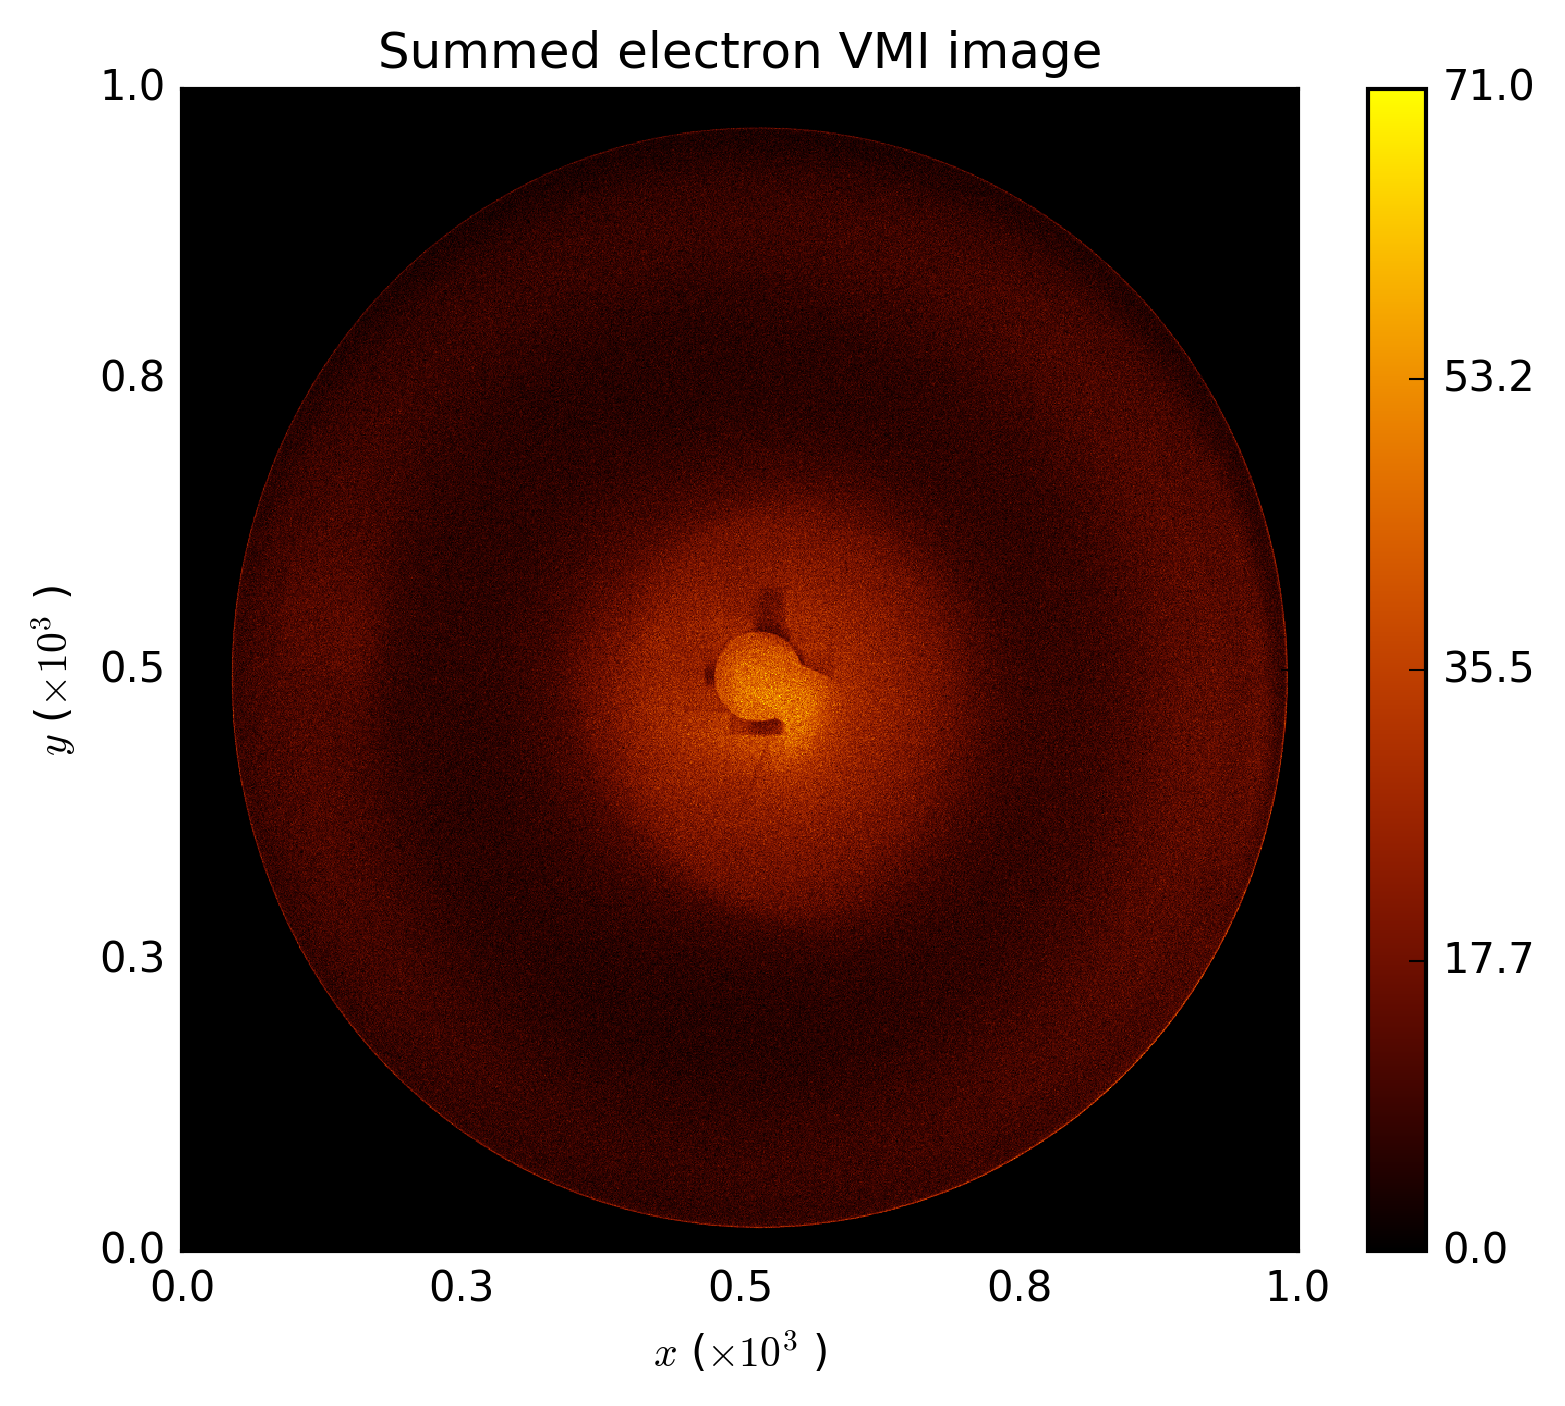

In [4]:
lims = [0,1024]
figOpts = { 'xIn':6, 'yIn':5, 'xLims':lims, 'yLims':lims, 'zLabel':'Summed electron VMI image' }
fOp2 = { 'xIn':6, 'yIn':5, 'xLims':lims, 'yLims':lims, 'newFigure':False }
colorPlot(np.arange(1024), np.arange(1024), opal, **figOpts)

# Center finding

### Downbin and find center

In [5]:
# downbin image
sz = opal.shape
im_opal, ax = downbin(opal, d)

# apply hough transform and find peak for each radius
h_opal, hax = [], []
xpk, ypk    = [], []
for ind, radius in enumerate(radii):
    hax.append( np.arange(-radius, 1024 + radius, d) )
    h_opal.append(hough_circle_trans(im_opal, radius, d, thresh=min_thresh, update=update))
    
    pk = find_peak(h_opal[ind], pk_thresh, edge_size)
    xpk.append( d*pk[0] - radii[ind] )
    ypk.append( d*pk[1] - radii[ind] )
    
print 'chosen radius, x, y center pixel'
print np.array(radii)
print np.array(xpk)
print np.array(ypk)

circle created
100 / 256
200 / 256
done with radius 160
circle created
100 / 256
200 / 256
done with radius 240
circle created
100 / 256
200 / 256
done with radius 400
circle created
100 / 256
200 / 256
done with radius 432
circle created
100 / 256
200 / 256
done with radius 456
circle created
100 / 256
200 / 256
done with radius 480
circle created
100 / 256
200 / 256
done with radius 496
chosen radius, x, y center pixel
[160 240 400 432 456 480 496]
[548 732 528 536 532 528 524]
[484 460 484 476 476 500 524]


In [6]:
# stack transformed images and find center
h_tot = np.zeros_like(im_opal)
for ind, r in enumerate(sum_r):
    if r in radii:
        rd = int(r/d)
        h_tot += h_opal[radii.index(r)][rd:(int(sz[0]/d)+rd),rd:(int(sz[1]/d)+rd)]
pk_tot = d * np.array( find_peak(h_tot, pk_thresh, edge_size) )

### Choose which center is best

In [7]:
center_best = np.array(pk_tot)
# np.save( install_path + filepath + '/opal_center', center_best )

NameError: name 'install_path' is not defined

### Plot centers found

(None, None)
(None, None)


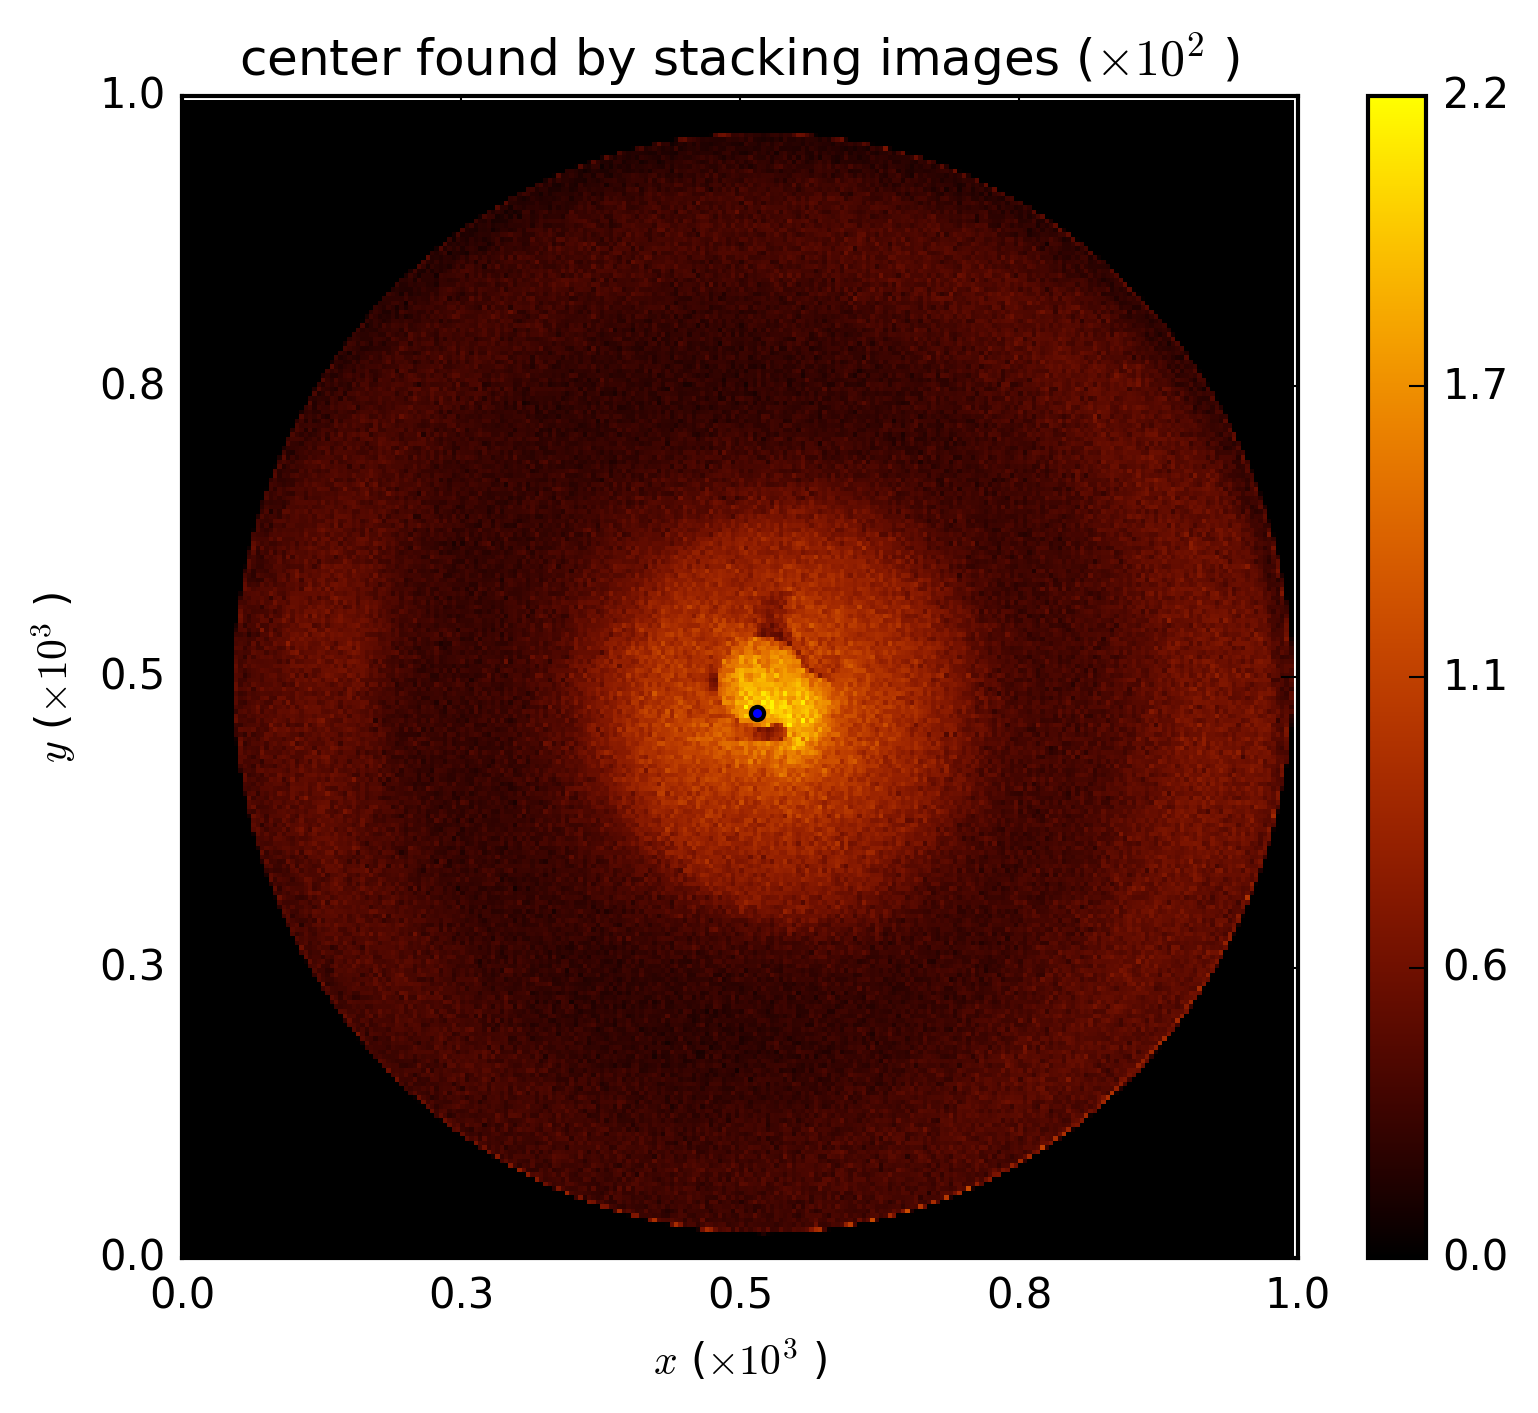

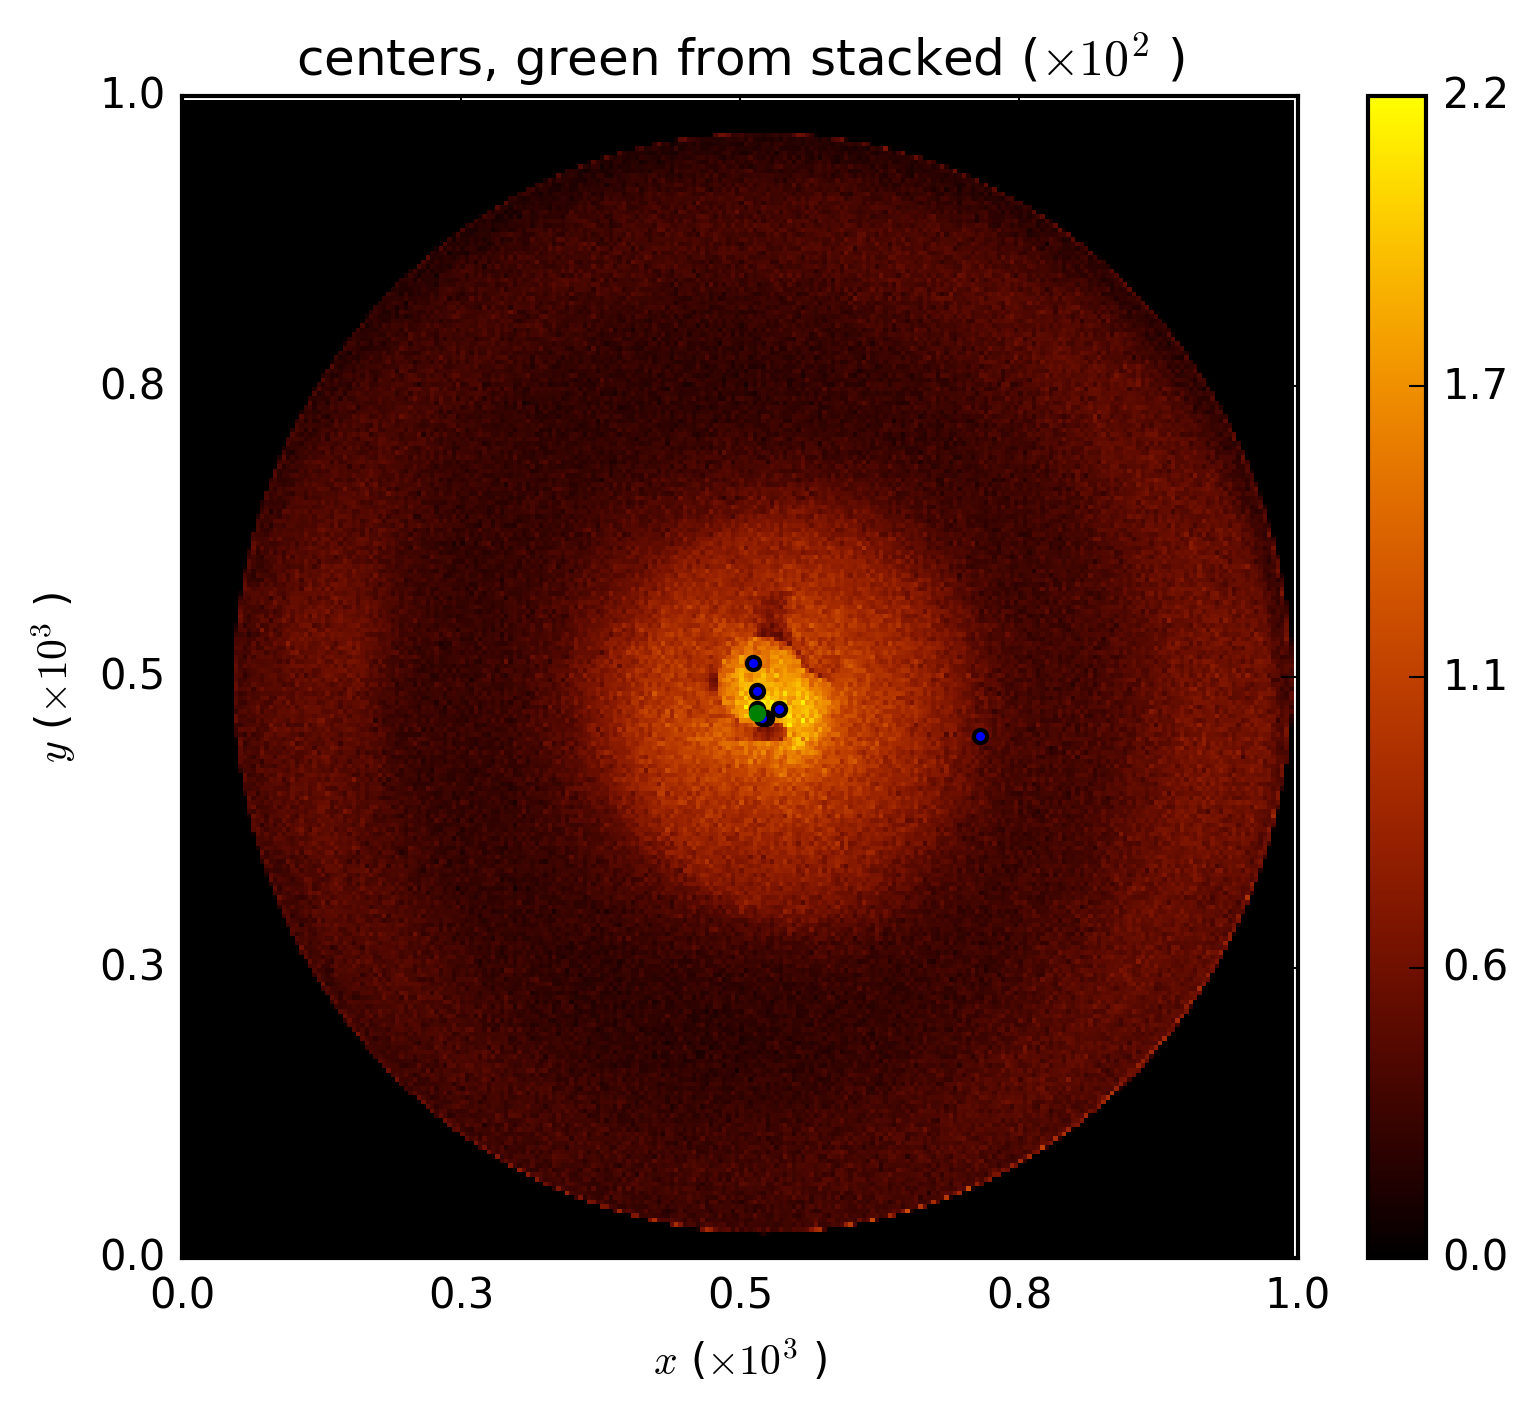

In [9]:
#colorPlot(ax, ax, h_tot, **figOpts)

figOpts = { 'xIn':6, 'yIn':5, 'xLims':lims, 'yLims':lims }

colorPlot(ax, ax, im_opal, zLabel='center found by stacking images', **figOpts)
plt.scatter( pk_tot[0], pk_tot[1], s=10 )
colorPlot(ax, ax, im_opal, zLabel='centers, green from stacked', **figOpts)
plt.scatter( np.array(xpk), np.array(ypk), s=10 )
_=plt.scatter( pk_tot[0], pk_tot[1], s=10, color='green' )

### Compare opal and transformed image for each radius

(None, None)


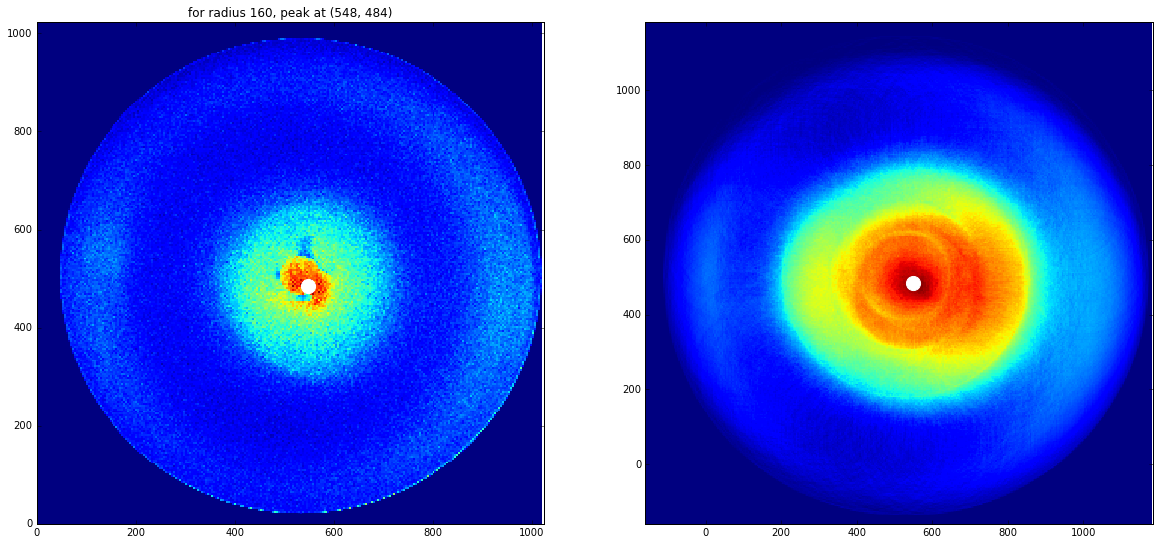

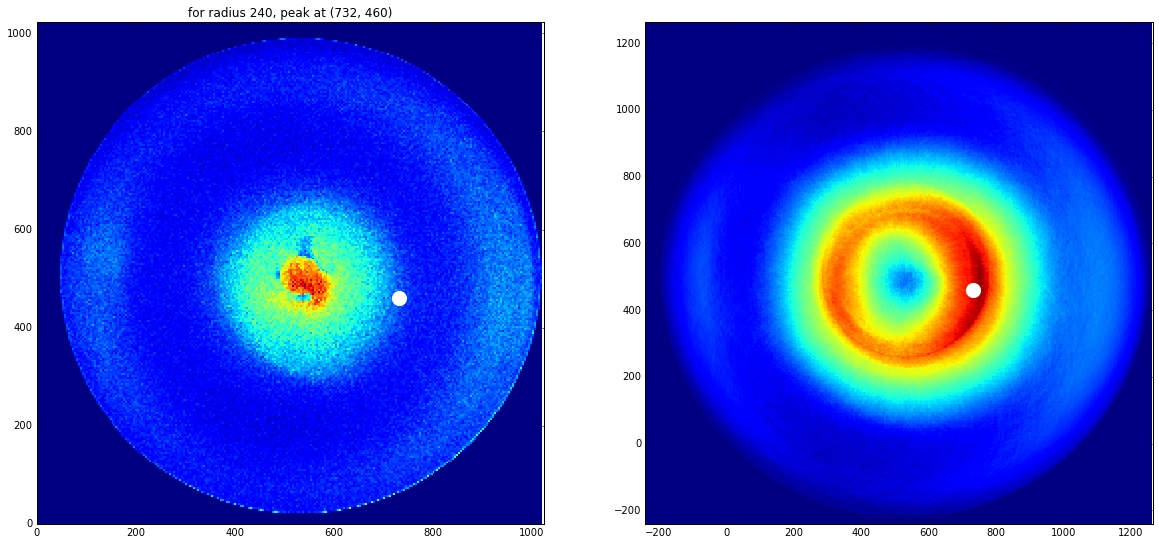

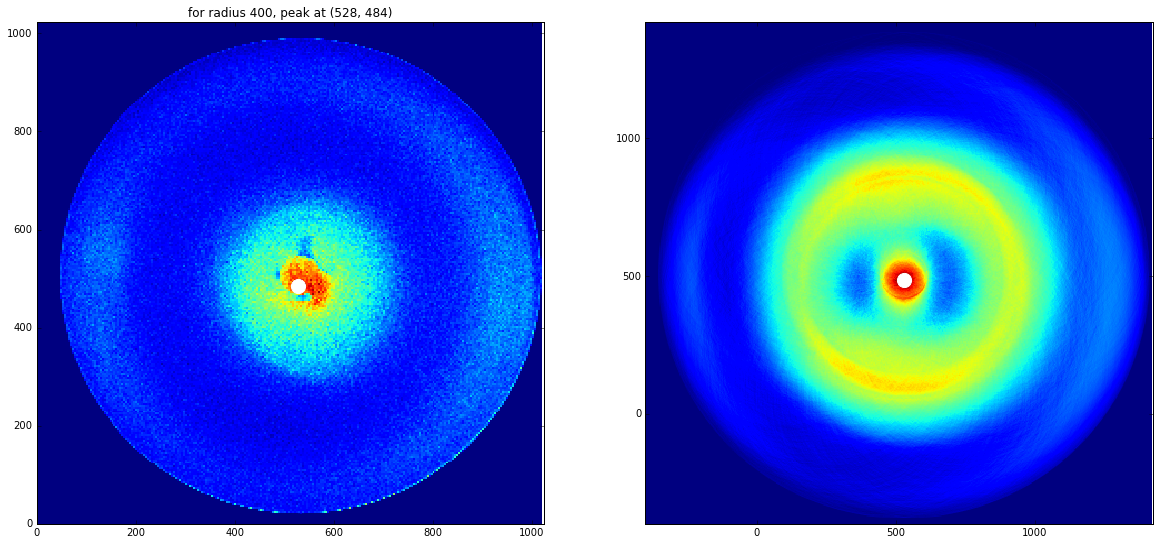

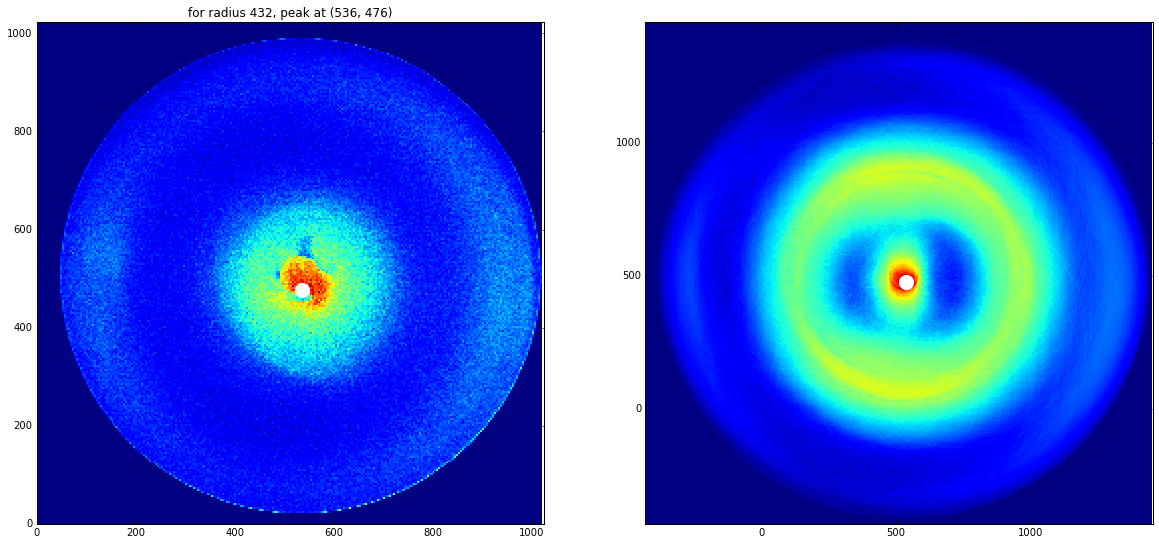

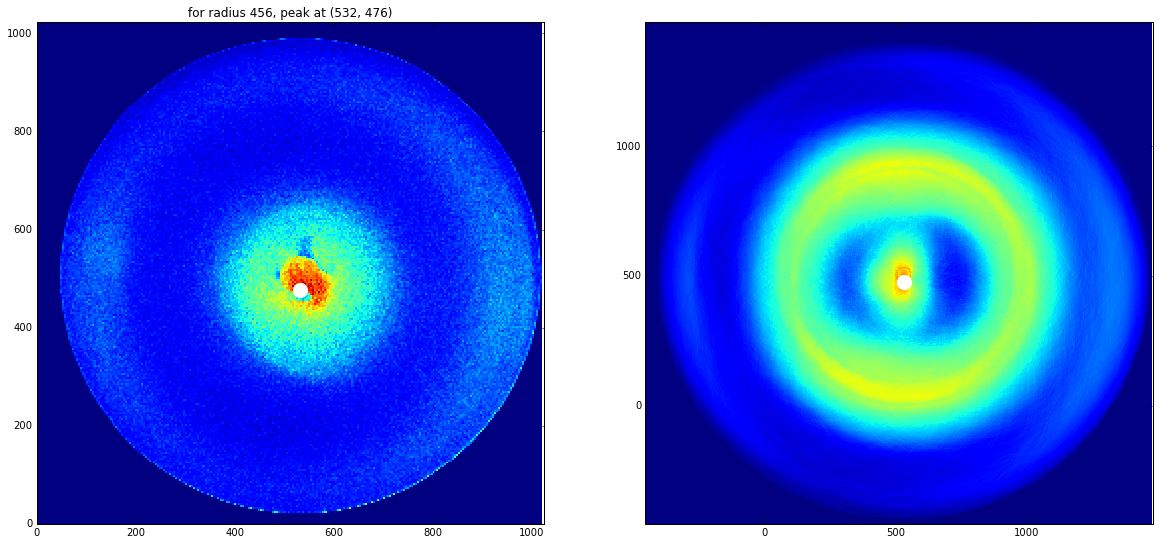

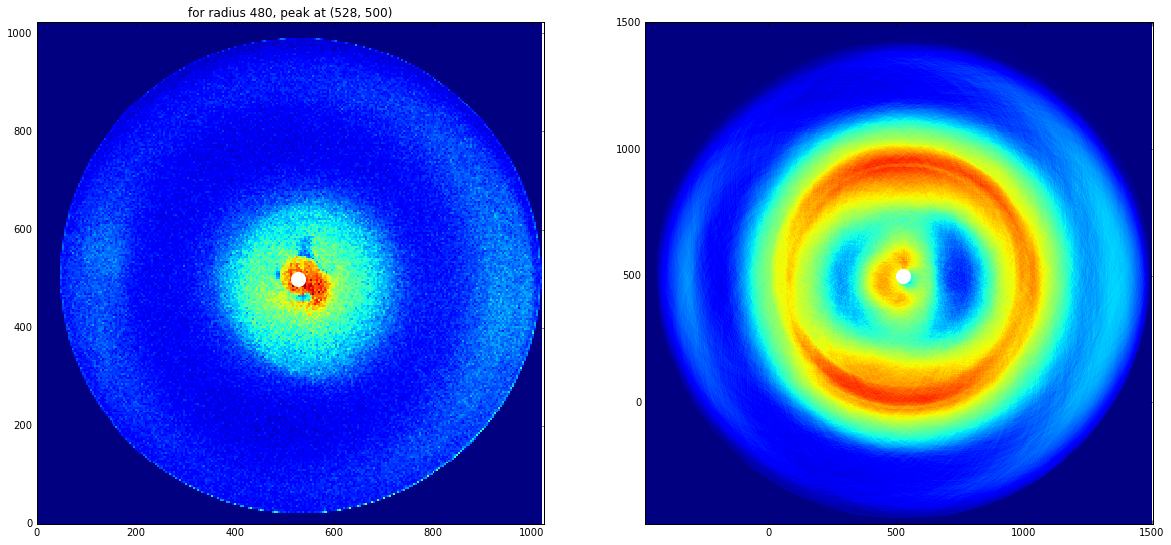

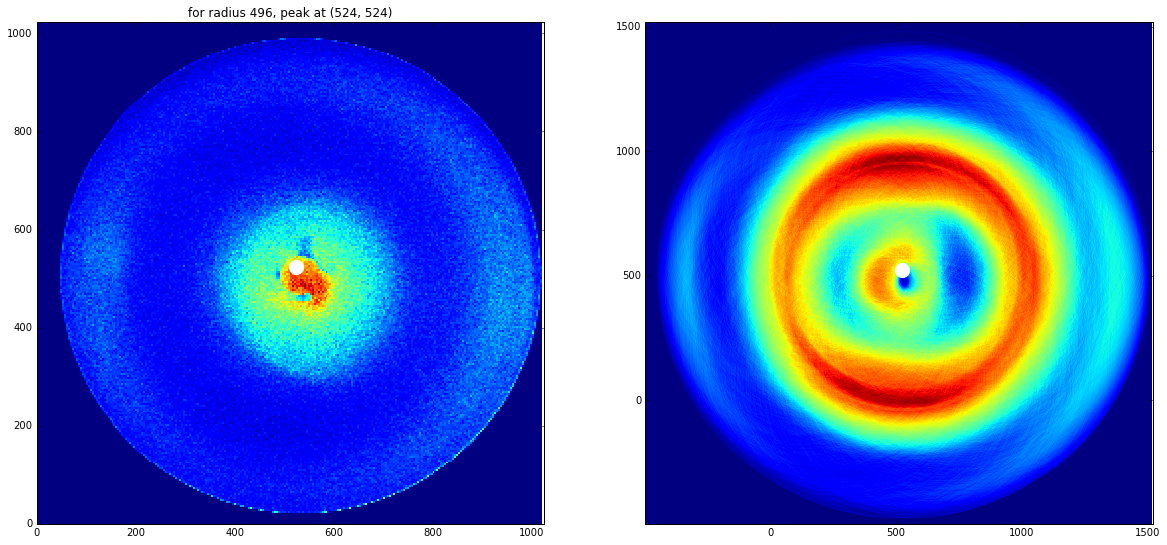

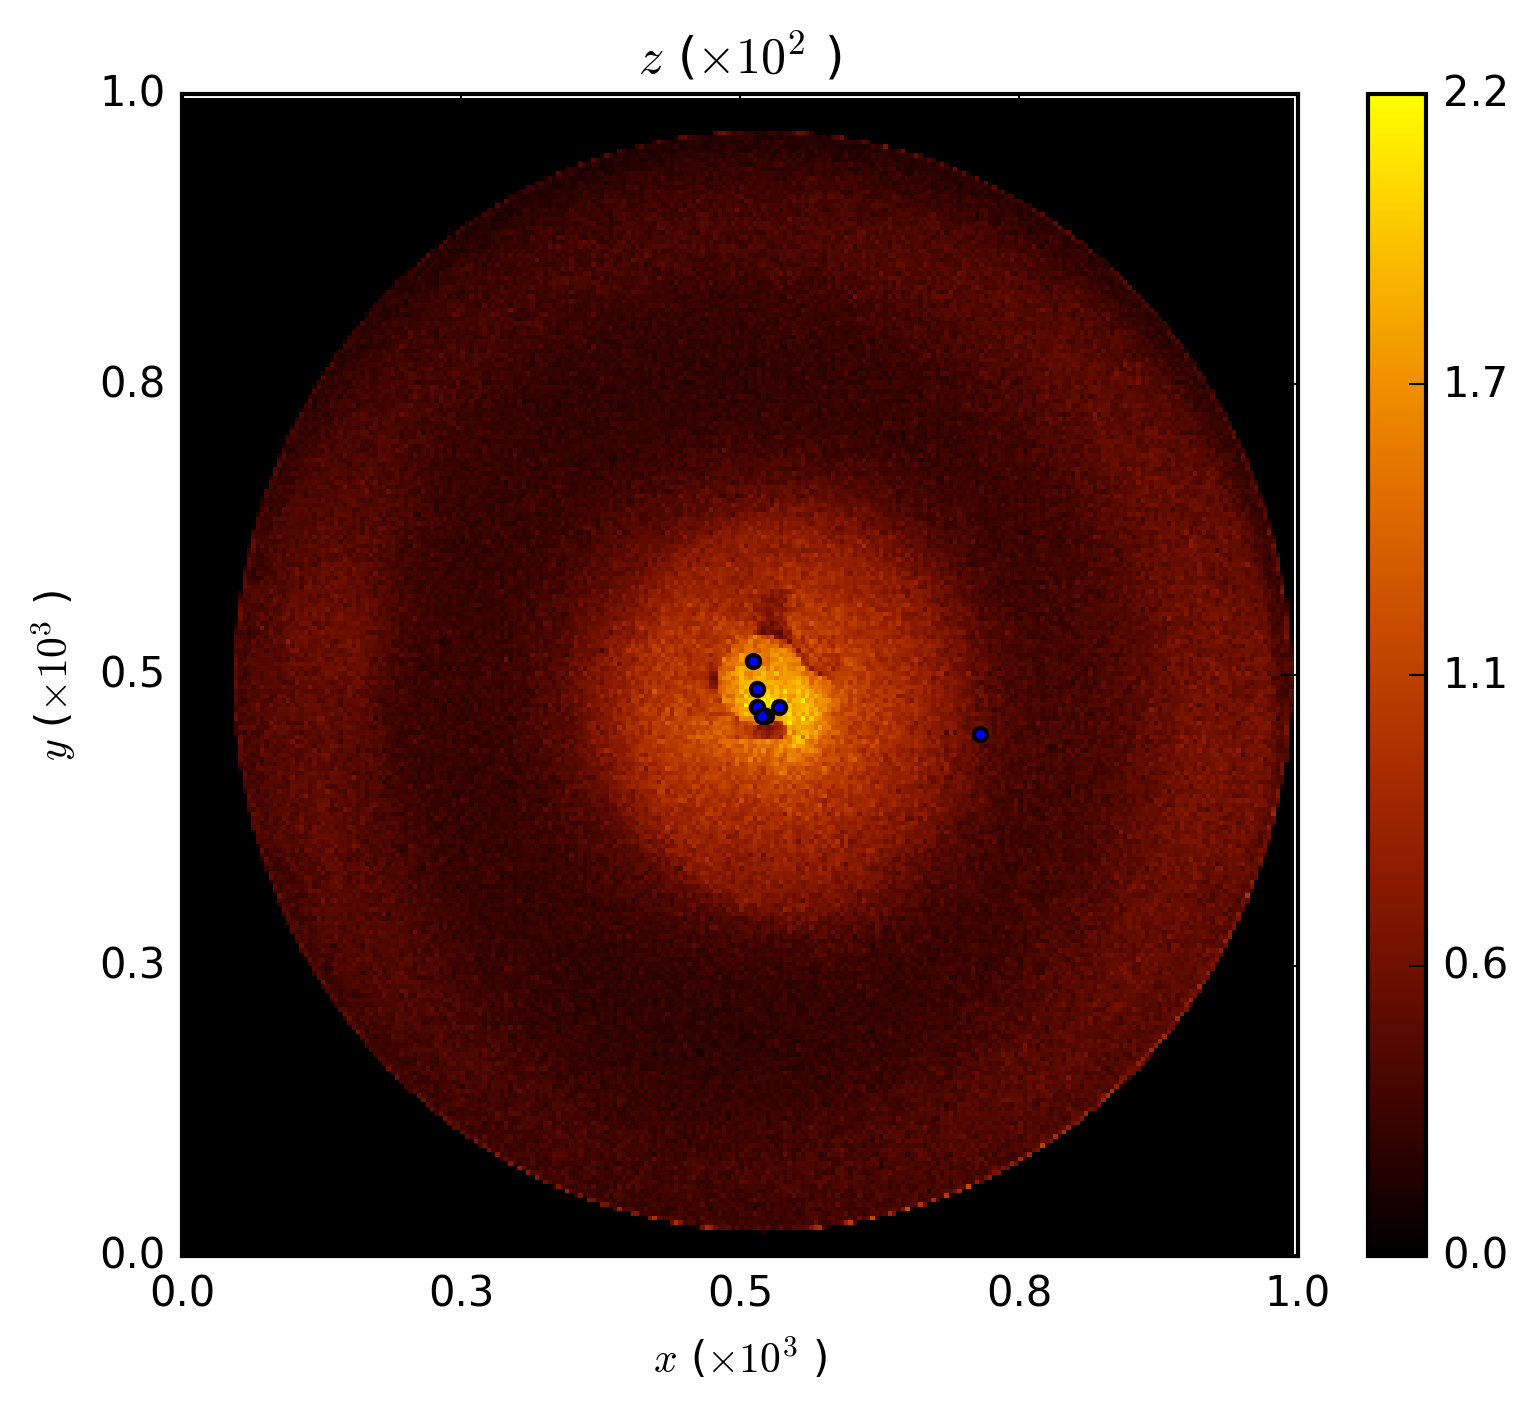

In [10]:
for ind, r in enumerate(np.array(radii)):
    
    plt.figure(figsize=(20,9))
    plt.subplot(1,2,1)
    plt.pcolor(ax, ax, im_opal)
    plt.scatter(xpk[ind], ypk[ind], s=200, color='white')
    plt.xlim((0,sz[0]))
    plt.ylim((0,sz[1]))
    plt.title('for radius %d, peak at (%d, %d)' %(r, xpk[ind], ypk[ind]))
    plt.subplot(1,2,2)
    plt.pcolor(hax[ind], hax[ind], h_opal[ind])
    plt.scatter(xpk[ind], ypk[ind], s=200, color='white')
    plt.xlim((-r,sz[0]+r))
    plt.ylim((-r,sz[1]+r))
    
colorPlot(ax, ax, im_opal, **figOpts)
_=plt.scatter( np.array(xpk), np.array(ypk), s=10 )